# Food101

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [0]:
path = untar_data(URLs.FOOD); path

PosixPath('/home/jupyter/.fastai/data/food-101')

In [0]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/food-101/train.json'),
 PosixPath('/home/jupyter/.fastai/data/food-101/test.txt'),
 PosixPath('/home/jupyter/.fastai/data/food-101/h5'),
 PosixPath('/home/jupyter/.fastai/data/food-101/test.json'),
 PosixPath('/home/jupyter/.fastai/data/food-101/images'),
 PosixPath('/home/jupyter/.fastai/data/food-101/train.txt'),
 PosixPath('/home/jupyter/.fastai/data/food-101/labels.txt'),
 PosixPath('/home/jupyter/.fastai/data/food-101/classes.txt')]

In [0]:
path_img = path/'images'
train_path = path/'train.txt'
test_path = path/'test.txt'

In [0]:
def flielist2df(path):
  df = pd.read_csv(path,delimiter='/',header=None,names=['label','name'])
  df['name'] = df['label'].astype(str)+ "/" + df['name'].astype(str)+ ".jpg"
  return df

In [0]:
test_df = flielist2df(test_path)
train_df = flielist2df(train_path)
np.random.seed(42)

In [0]:
data = (ImageList.from_df(df=train_df, path=path_img, cols=1)
        .split_by_rand_pct(0.2)
        .label_from_df(cols=0)
        .transform(get_transforms(), size=224)
        .databunch(bs=bs)
        .normalize(imagenet_stats))
        

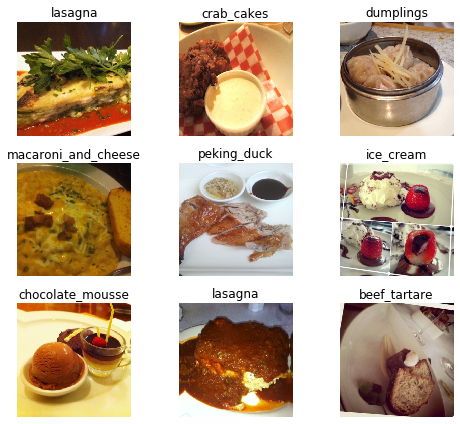

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

(101, 101)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.63E-03
Min loss divided by 10: 4.79E-03


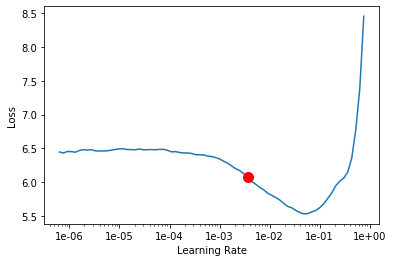

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
lr = 1e-3

In [0]:
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,2.487348,1.883601,0.472277,05:42
1,1.839520,1.471150,0.382838,05:43
2,1.600548,1.322619,0.348383,05:42
3,1.416680,1.233800,0.324818,05:45
4,1.318326,1.222917,0.325743,05:44


In [0]:
learn.save('food101-test-epoch5')

In [0]:
learn.load('food101-test-epoch5')

Learner(data=ImageDataBunch;

Train: LabelList (60600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: /home/jupyter/.fastai/data/food-101/images;

Valid: LabelList (15150 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
clam_chowder,macaroni_and_cheese,tacos,macaroni_and_cheese,lobster_roll_sandwich
Path: /home/jupyter/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kerne

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.92E-06
Min loss divided by 10: 8.32E-07


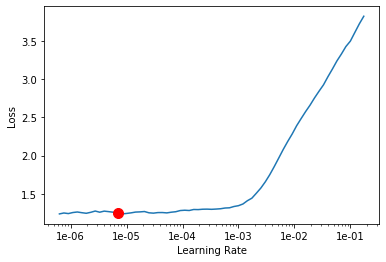

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(5,max_lr=slice(1e-6, 1e-3))
learn.save('food-101-test-e10')

epoch,train_loss,valid_loss,accuracy,time
0,1.309220,1.170863,0.690033,09:44
1,1.221587,1.053303,0.719274,06:14
2,0.976850,0.944113,0.748251,06:47
3,0.763542,0.886867,0.765215,06:00
4,0.667175,0.876146,0.767129,06:09


In [0]:
learn.fit_one_cycle(5,max_lr=slice(1e-6, 1e-3))
learn.save('food-101-test-e15')

epoch,train_loss,valid_loss,accuracy,time
0,0.724729,0.938271,0.754785,06:10
1,0.799545,0.937478,0.754125,06:08
2,0.667873,0.905670,0.766139,06:10
3,0.509435,0.875574,0.777888,06:10
4,0.390381,0.867634,0.779208,06:10


In [0]:
learn.fit_one_cycle(5,max_lr=slice(1e-6, 1e-3))
learn.save('food-101-test-e20')

epoch,train_loss,valid_loss,accuracy,time
0,0.485801,0.935089,0.767723,06:07
1,0.569257,0.954776,0.762904,06:07
2,0.492050,0.938474,0.774455,06:05
3,0.325303,0.920676,0.782508,06:07
4,0.253363,0.919358,0.783234,06:06


In [0]:
learn.fit_one_cycle(5,max_lr=slice(1e-6, 1e-3))
learn.save('food-101-test-e25')

epoch,train_loss,valid_loss,accuracy,time
0,0.305656,0.975098,0.771881,06:04
1,0.422364,1.029663,0.763102,06:22
2,0.339482,1.018424,0.773135,06:08
3,0.230237,0.994576,0.779406,06:10
4,0.171719,0.984958,0.784026,06:08


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06
Min loss divided by 10: 1.32E-03


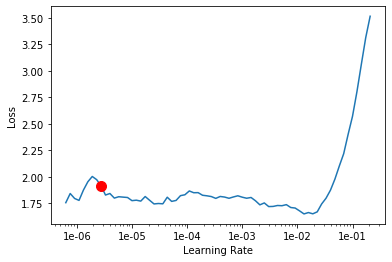

In [0]:
bs=16
data = (ImageList.from_df(df=train_df, path=path_img, cols=1)
        .split_by_rand_pct(0.2)
        .label_from_df(cols=0)
        .transform(get_transforms(), size=512)
        .databunch(bs=bs)
        .normalize(imagenet_stats))
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.load('food-101-test-e25')

learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-2))
learn.save('food-101-test-e30-512')

epoch,train_loss,valid_loss,accuracy,time
0,1.726509,1.229910,0.680264,17:38
1,1.754154,5.167667,0.658482,17:36
2,1.209241,12.719763,0.732937,17:32
3,0.798991,5.043008,0.806931,17:25
4,0.635032,3.459187,0.828581,17:26


In [0]:
learn.export()

In [0]:
learn.path

PosixPath('/home/jupyter/.fastai/data/food-101/images')

In [0]:
bs=16
data = (ImageList.from_df(df=train_df, path=path_img, cols=1)
        .split_by_rand_pct(0.2)
        .label_from_df(cols=0)
        .transform(get_transforms(), size=512)
        .databunch(bs=bs)
        .normalize(imagenet_stats))
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.load('food-101-test-e30-512')

Learner(data=ImageDataBunch;

Train: LabelList (60600 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: /home/jupyter/.fastai/data/food-101/images;

Valid: LabelList (15150 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
french_toast,clam_chowder,pulled_pork_sandwich,churros,chicken_curry
Path: /home/jupyter/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 7.59E-08


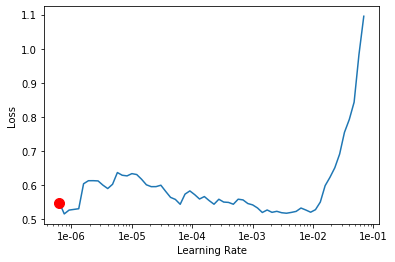

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-7, 1e-3))
learn.save('food-101-test-e35-512')

epoch,train_loss,valid_loss,accuracy,time
0,0.579344,2.526466,0.891089,18:44
1,0.616234,1.309994,0.881848,17:34
2,0.547002,2.165248,0.887063,17:36
3,0.533189,1.389635,0.895115,17:32
4,0.510317,1.402809,0.892805,17:36


In [0]:
learn.export()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-8, 1e-4))
learn.save('food-101-test-e40-512')

epoch,train_loss,valid_loss,accuracy,time
0,0.444524,1.790350,0.893861,17:29
1,0.478889,1.519668,0.894587,17:34
2,0.381335,0.940773,0.894587,17:32
3,0.472357,2.092799,0.893069,17:32
4,0.433019,3.695861,0.887129,17:32
